# Análise Titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math as mt
import statistics as st

In [2]:
data = pd.read_csv('titanic.csv')
data.head(4)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


+ Qual a quantidade de pessoas de ambos os sexos?

In [3]:
sex = list(data['Sex'])
sex_fem = sex.count('female')
sex_male = sex.count('male')

print(f'Sexo feminino = {sex_fem}')

Sexo feminino = 314


In [4]:
print(f'Sexo masculino = {sex_male}')

Sexo masculino = 573


+ Total de passageiros:

In [5]:
tamanho = len(sex)
print(f'Total = {tamanho}')

Total = 887


+ Dados percentuais em relação a população total:

In [6]:
p_fem = sex_fem / tamanho
print(f'{p_fem * 100}% = sexo feminino!')


35.400225479143174% = sexo feminino!


In [7]:
p_m = (sex_male / tamanho)
print(f'{p_m * 100}% = sexo masculino!')

64.59977452085683% = sexo masculino!


+ Gráfico:

<BarContainer object of 2 artists>

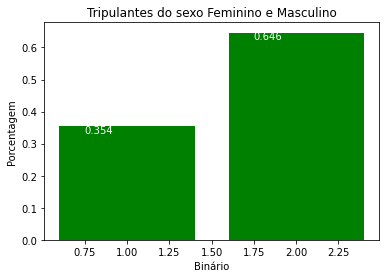

In [8]:
n = 2
x = range(1, n + 1)

lista = []
lista.append(p_fem)
lista.append(p_m)
lista

plt.xlabel('Binário')
plt.ylabel('Porcentagem')

for a,b in zip(x, lista):
    plt.text(a-0.25, b-0.02, str(round(b,4)), color='white')
plt.title('Tripulantes do sexo Feminino e Masculino')
plt.bar(x, lista, color ='green')


+ Qual a quantiade de pessoas de ambos os sexos que sobreviveram ao naufrágio?

+ Qual a quantiade de pessoas de ambos os sexos que faleceram ao naufrágio?

In [9]:
sur_sex = data[['Survived', 'Sex']]
sur_sex.head(4)

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female


+ Tripulantes do sexo masculino que não sobreviveram ao naufragio:

In [10]:
data0 = pd.read_csv('titanic.csv')
data0.loc[(data0['Survived'] == 0) & (data0['Sex'] == 'male'), 'Sex'] = 'n/s' 
data0[['Survived', 'Sex']]

no_surv_male = list(data0['Sex'])

no_surv_male = no_surv_male.count('n/s')

print(f'Não sobreviventes do sexo masculino = {no_surv_male}')


Não sobreviventes do sexo masculino = 464


+ Pessoas do sexo masculino que sobreviveram:

In [11]:
data1 = pd.read_csv('titanic.csv')
data1.loc[(data1['Survived'] == 1) & (data1['Sex'] == 'male'), 'Sex'] = 'yes/s'
data1[50:60][['Survived', 'Sex']]
data1 = list(data1['Sex'])

yes_surv_male = data1.count('yes/s')

print(f'Sobreviventes do sexo masculino = {yes_surv_male}')


Sobreviventes do sexo masculino = 109


+ Pessoas do sexo feminino que não sobreviveram ao naufragio:

In [12]:
data0f = pd.read_csv('titanic.csv')
data0f.loc[(data0f['Survived'] == 0) & (data0f['Sex'] == 'female'), 'Sex'] = 'n/s' 
data0f[['Survived', 'Sex']]
no_surv_f = list(data0f['Sex'])

no_surv_f = no_surv_f.count('n/s')

print(f'Não sobreviventes do sexo feminino = {no_surv_f}')

Não sobreviventes do sexo feminino = 81


+ Tripulantes do sexo feminino que sobreviveram:

In [13]:
data1f = pd.read_csv('titanic.csv')
data1f.loc[(data1f['Survived'] == 1) & (data1f['Sex'] == 'female'), 'Sex'] = 'yes/s' 
data1f[['Survived', 'Sex']]
yes_surv_f = list(data1f['Sex'])
yes_surv_f = yes_surv_f.count('yes/s')

print(f'Sobreviventes do sexo feminino = {yes_surv_f}')


Sobreviventes do sexo feminino = 233


+ Número de vítimas do sexo masculino em relação a população total %:

In [14]:
p_m_t = (no_surv_male / 887) * 100
print(f'Taxa percentual de mortos do sexo masculino em relação a população total = {p_m_t}%')


Taxa percentual de mortos do sexo masculino em relação a população total = 52.311161217587376%


+ Número de vítimas do sexo masculino em relação a população do sexo masculino %: 

In [15]:
p_m_a = (no_surv_male / sex_male) * 100
print(f'Taxa percentual de mortos do sexo masculino em relação a população do sexo masculino = {p_m_a}%')


Taxa percentual de mortos do sexo masculino em relação a população do sexo masculino = 80.97731239092496%


+ Número de vítimas do sexo feminino em relação a população total:

In [16]:
p_f_t = (no_surv_f / 887 ) * 100
print(f'Taxa percentual de mortes do sexo feminino em relação a população total = {p_f_t}%')


Taxa percentual de mortes do sexo feminino em relação a população total = 9.131905298759865%


+ Número de vítimas do sexo feminino em relação a população do sexo feminino:

In [17]:
p_f_a = (no_surv_f / sex_fem) * 100
print(f'Taxa percentual de mortes do sexo feminino  em relação a população do sexo feminino = {p_f_a}%')

Taxa percentual de mortes do sexo feminino  em relação a população do sexo feminino = 25.796178343949045%


+ Número de vítimas e sobreviventes de ambos os sexos;

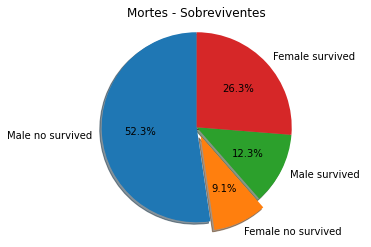

In [18]:
labels = 'Male no survived', 'Female no survived', 'Male survived', 'Female survived'
sizes = [464, 81, 109, 233]
explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Mortes - Sobreviventes")
plt.show()



+ Sobreviventes e não sobreviventes do sexo masculino:

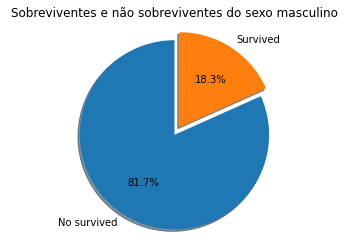

In [19]:
labels = 'No survived', 'Survived'
sizes = [464, 104]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal') 
ax1.set_title("Sobreviventes e não sobreviventes do sexo masculino")
plt.show()

+ Sobreviventes e não sobreviventes do sexo feminino:

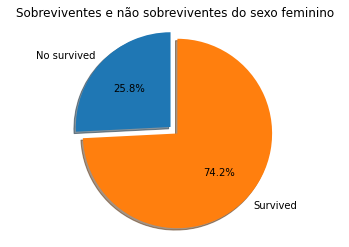

In [20]:
labels = 'No survived', 'Survived'
sizes = [81, 233]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal') 
ax1.set_title("Sobreviventes e não sobreviventes do sexo feminino")
plt.show()

#### Em ralação as idades

In [21]:
age = pd.read_csv('titanic.csv')
age = age[['Age']]
age.describe()

,Age
count,887.000000
mean,29.471443
std,14.121908
min,0.420000
25%,20.250000
50%,28.000000
75%,38.000000
max,80.000000


<AxesSubplot:title={'center':'Distrubuição de frequência das idades'}, xlabel='Idades', ylabel='Frequency'>

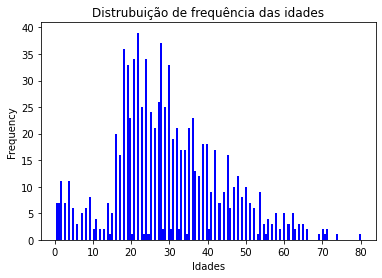

In [22]:
plt.title('Distrubuição de frequência das idades')
plt.xlabel('Idades')
age['Age'].plot.hist(bins = 150, color = 'blue')
#plt.style.use('dark_background')


<AxesSubplot:title={'center':'Distrubuição'}, xlabel='Idades', ylabel='Density'>

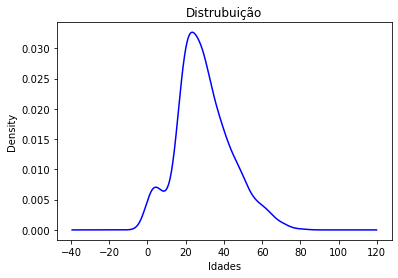

In [23]:
plt.title('Distrubuição')
plt.xlabel('Idades')
age['Age'].plot.kde(color = 'blue')
#plt.style.use('dark_background')

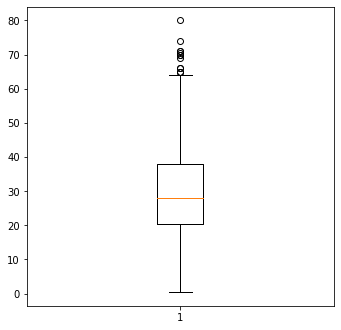

In [24]:
fig = plt.figure(figsize =(5.5, 5.5))
plt.boxplot(age)
plt.show()

#### Classes dos tripulantes: Class 1, class 2, class 3;

+ High class 1; 
+ Medium class 2; 
+ Low class 3;

In [25]:
dados_pclass = pd.read_csv('titanic.csv')
pclass = dados_pclass[['Pclass']]

pclass.head(8)

,Pclass
0,3
1,1
2,3
3,1
4,3
5,3
6,1
7,3


+ For high class:

In [26]:
f_hight = list(dados_pclass['Pclass'])

for i in f_hight:
    class_hight = f_hight.count(3)    
print(f'high class = {class_hight}')    


high class = 487


+ For medium class:

In [27]:
f_medium = list(dados_pclass['Pclass'])

for i in f_medium:
    class_medium = f_medium.count(2)    
print(f'medium class = {class_medium}')

medium class = 184


+ For low class:

In [28]:
f_low = list(dados_pclass['Pclass'])

for i in f_low:
    class_low = f_low.count(1)    
print(f'Low class = {class_low}')

Low class = 216


+ Aqui criamos a área que plotamos o gráfico e definimos seu tamanho:

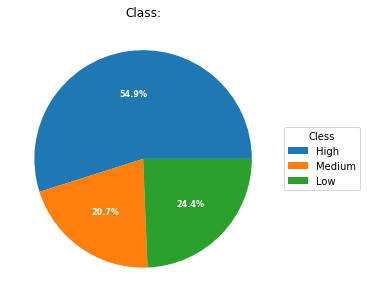

In [29]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
 
recipe = ["High",
          "Medium",
          "Low"]
 
data = [487, 184, 216]

# Aqui serão colocados os kg e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(pct/100.*np.sum(allvals))
    # fazendo legenda do gráfico com % e kg
    return "{:.1f}%".format(pct, absolute)

# Criando o gráfico e colocando a função da legenda interna
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai 'ancorar o box'
ax.legend(wedges, recipe,
          title="Cless",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Class:")
plt.show()

#### Tarifa ('Fare') 

+ Tarifa de cada classe;
+ Somatório do valor da tarifa de cada classe;
+ Tarifa mais alta;
+ Tarifa mais Baixa;
+ Tarifa Média;
+ Moda;

In [30]:
data_f = pd.read_csv('titanic.csv')
data_fare = list(data_f['Fare'])
data_f.head(4)



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000


+ Sum Fare:

In [31]:
sum_f = sum(data_fare)
sum_f

28654.907699999967

+ Class 1;
+ High;

In [32]:
slicing_data_frame = data_f.loc[(data_f['Pclass']==1) & (data_f['Fare'] > 0)]
slicing_data_frame[['Pclass', 'Fare']].head(4)


,Pclass,Fare
1,1,71.2833
3,1,53.1000
6,1,51.8625
11,1,26.5500


+ Sum of class 1: 

In [33]:
data_c1 = list(slicing_data_frame['Fare'])
s = sum(data_c1)
s

18177.412499999984

+ Max of class 1:

In [34]:
max_ = np.amax(data_c1)
max_

512.3292

+ Min of class 1: 

In [35]:
min_ = np.amin(data_c1)
min_

5.0

+ Mean of class 1:

In [36]:
m = np.mean(data_c1)
m

86.14887440758294

+ Mode of class 1:

In [37]:
mode_c1 = st.mode(data_c1)
mode_c1

26.55

+ Class 2:

In [38]:
slic_data_frame = data_f.loc[(data_f['Pclass']==2) & (data_f['Fare']>0)]
slic_data_frame[['Pclass', 'Fare']].head(4)


,Pclass,Fare
9,2,30.0708
15,2,16.0000
17,2,13.0000
20,2,26.0000


+ Sum of class 2:

In [39]:
data_f_c2 = list(slic_data_frame['Fare'])
sum_f_c2 = np.sum(data_f_c2)
sum_f_c2

3801.8417

+ Max of class 2: 

In [40]:
max_c2 = np.amax(data_f_c2)
max_c2

73.5

+ Min of class 2:

In [41]:
min_c2 = np.amin(data_f_c2)
min_c2

10.5

+  Mean of class 2:

In [42]:
mean_c2 = np.mean(data_f_c2)
mean_c2

21.358661235955054

+ Mode of class 2: 

In [43]:
mode_c2 = st.mode(data_f_c2)
mode_c2

13.0

+  Class 3 fare: 

In [44]:
slic_data_frame3 = data_f.loc[(data_f['Pclass']==3) & (data_f['Fare']>0)]
slic_data_frame3[['Pclass', 'Fare']].head(4)
                              

,Pclass,Fare
0,3,7.2500
2,3,7.9250
4,3,8.0500
5,3,8.4583


+ Sum of class 3: 

In [45]:
data_f_c3 = list(slic_data_frame3['Fare'])
sum_c3 = sum(data_f_c3)
sum_c3

6675.653500000002

+ Max of class 3: 

In [46]:
max_c3 = np.amax(data_f_c3)
max_c3

69.55

+ Min of class 3: 

In [47]:
min_c3 = np.amin(data_f_c3)
min_c3

4.0125

+ Mean of class 3: 

In [48]:
mean_c3 = np.mean(data_f_c3)
mean_c3

13.82122877846791

+ Mode of class 3: 

In [49]:
mode_c3 = st.mode(data_f_c3)
mode_c3


8.05

+ Gráficos: 

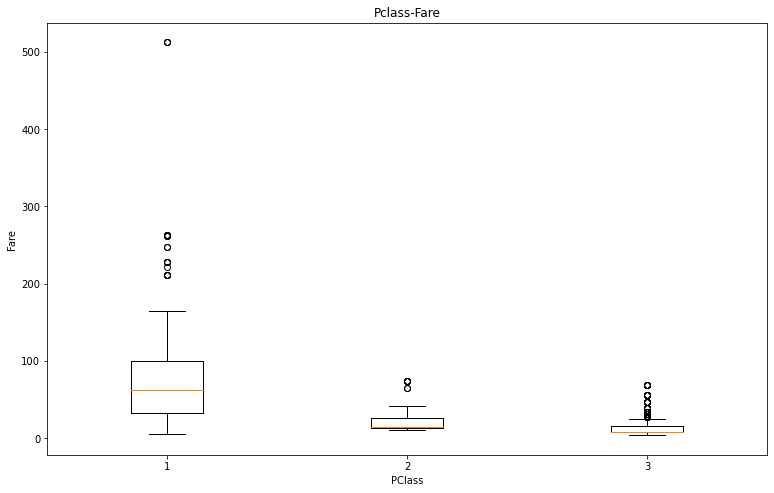

In [50]:
data_classe1 = data_c1
data_classe2 = data_f_c2
data_classe3 = data_f_c3
data = [data_classe1, data_classe2, data_classe3]
 
fig = plt.figure(figsize =(10, 6))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data)
plt.title('Pclass-Fare')
plt.xlabel('PClass')
plt.ylabel('Fare')
plt.show()

+ Tarifa em relação as classes: 

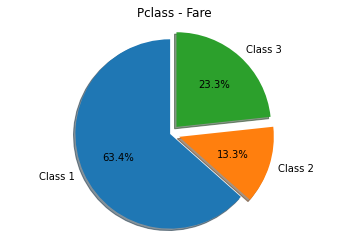

In [51]:
labels = 'Class 1', 'Class 2', 'Class 3'
sizes = [18177.412499999984, 3801.8417, 6675.653500000002]
explode = (0, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal') 
ax1.set_title('Pclass - Fare')
plt.show()